In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values, replace_values_by_condition, replace_list_values_by_condition, format_wordcloud_text
from ipynb.fs.full.plots import single_barplot, wordcloud

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [4]:
df[['D12_ML_Project_Context_Banking', 'D12_ML_Project_Context_Defense', 'D12_ML_Project_Context_Education', 'D12_ML_Project_Context_Embedded', 'D12_ML_Project_Context_Entertainment', 'D12_ML_Project_Context_Healthcare', 'D12_ML_Project_Context_Insurance', 'D12_ML_Project_Context_Logistics', 'D12_ML_Project_Context_Oil', 'D12_ML_Project_Context_Sales', 'D12_ML_Project_Context_Tellecom', 'D12_ML_Project_Context_Others']].head()

,D12_ML_Project_Context_Banking,D12_ML_Project_Context_Defense,D12_ML_Project_Context_Education,D12_ML_Project_Context_Embedded,D12_ML_Project_Context_Entertainment,D12_ML_Project_Context_Healthcare,D12_ML_Project_Context_Insurance,D12_ML_Project_Context_Logistics,D12_ML_Project_Context_Oil,D12_ML_Project_Context_Sales,D12_ML_Project_Context_Tellecom,D12_ML_Project_Context_Others
2,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted
3,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted
4,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,quoted
5,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted
6,quoted,quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted


In [5]:
print(df['D12_ML_Project_Context_Banking'].value_counts())
print()
print("Total de Questões marcadas: " + str(df['D12_ML_Project_Context_Banking'].value_counts()['quoted']))

not quoted    210
quoted         66
Name: D12_ML_Project_Context_Banking, dtype: int64

Total de Questões marcadas: 66


In [6]:
project_contexts = ['Banking', 'Defense', 'Education', 'Embedded', 'Entertainment', 'Healthcare', 'Insurance',
                    'Logistics', 'Oil', 'Sales', 'Tellecom']

In [7]:
# the values follow the same position of previous declared list
project_contexts_total = [
    df['D12_ML_Project_Context_Banking'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Defense'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Education'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Embedded'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Entertainment'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Healthcare'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Insurance'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Logistics'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Oil'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Sales'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Tellecom'].value_counts()['quoted'],
]

In [8]:
# dataframe specific for question D12
d12_df= pd.DataFrame(data={'Project Context': project_contexts, 'Answers': project_contexts_total})

In [9]:
d12_df

,Project Context,Answers
0,Banking,66
1,Defense,24
2,Education,37
3,Embedded,17
4,Entertainment,19
5,Healthcare,59
6,Insurance,20
7,Logistics,45
8,Oil,40
9,Sales,49


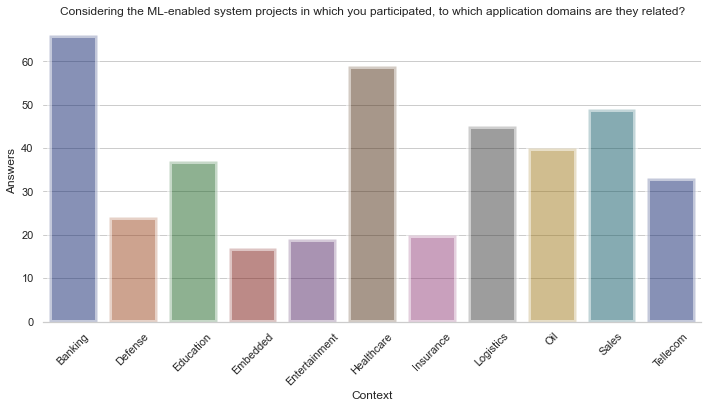

In [10]:
single_barplot(d12_df, "Project Context", "Answers", 
               title="Considering the ML-enabled system projects in which you participated, to which application domains are they related?",
               x_label="Context", y_label="Answers", x_label_rotation=45)

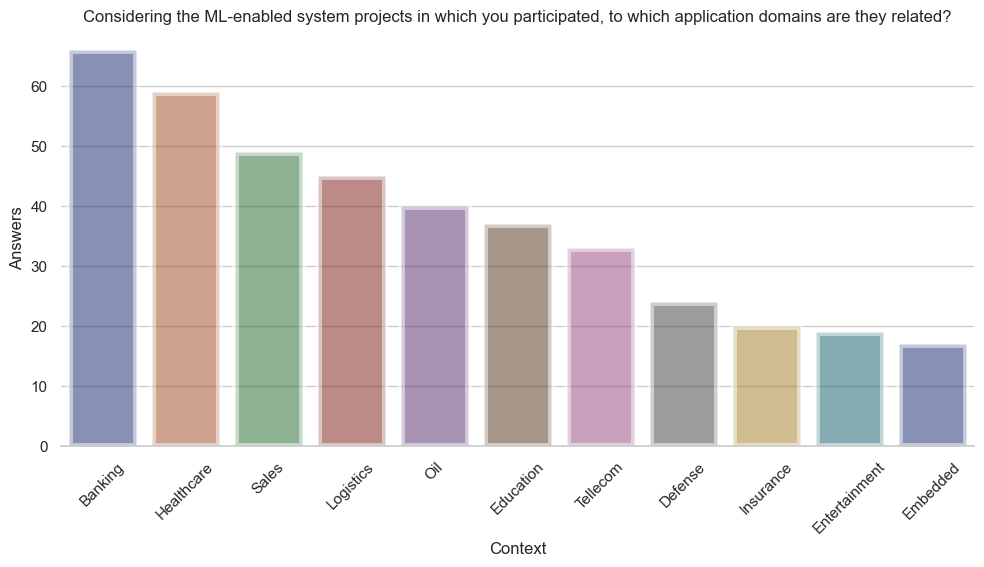

In [11]:
# we could sort the dataframe to plot the bars decreasingly
single_barplot(d12_df.sort_values(by=['Answers'], ascending=False), "Project Context", "Answers", 
               title="Considering the ML-enabled system projects in which you participated, to which application domains are they related?",
               x_label="Context", y_label="Answers", x_label_rotation=45)

In [13]:
# format values from df
df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'Human Resources ',
                                 'Human Resources', 'eq')
df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'Data analysis for autonomous driving',
                                 'Autonomous Driving', 'eq')
df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'Sistemas de internet das coisas ',
                                 'IoT', 'eq')

df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'r&d',
                                 'Research', 'eq')

df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'innovation',
                                 'Innovation', 'eq')

df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'System aimed at information security of companies in general.',
                                 'Network security', 'eq')

df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'Generic computer applications',
                                 'IT', 'eq')

df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'Saúde',
                                 'Health', 'eq')

df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'Segurança do trabalho',
                                 'Safety in Workplace', 'eq')

df = replace_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 'Construction, Mining',
                                 'Construction', 'eq')


replace_list_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 ['Sport', 'SPORTS', 'Sports, Production'], 'Sports', 'eq')

replace_list_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 ['Electricity Sector', 'Energia imbalance', 'Energy management', 'Energy - Electricity Generation'],
                                 'Energy', 'eq')

replace_list_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 ['Advertising', 'Mobile Ads ', 'Ad marketing, ERP, production management'],
                                 'Advertisement', 'eq')

replace_list_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 ['Manufacturing ', 'Manufacturing, Retail', 'Retail'],
                                 'Manufacturing', 'eq')

replace_list_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 ['Agriculture', 'Law, Agribusiness', 'agricultural'],
                                 'Agribusiness', 'eq')

replace_list_values_by_condition(df, 'D12_ML_Project_Context_Others_Free',
                                 ['computer vision', 'Manufacturing (computer vision for defect detection)'],
                                 'Computer Vision', 'eq')

In [17]:
for other in list(df['D12_ML_Project_Context_Others_Free'].unique()):
    print(other)

-99
Human Resources
Meteorology
Innovation
Autonomous Driving
Pricing
Energy
Compliance
nan
Automotive
IoT
Physics
Manufacturing
mobile apps
Sports
Kamu Kurumu Projesi
Network security
Gaming and Marketing
Virtual Assistants
Research
Smart Home
Consumer goods industry
Computer Vision
Production
Fraud Prevention
Advertisement
Smart Grid
Content Moderation
Accessibility
Agribusiness
Science
Fraud prevention
Government
Brand reputation and virtual assistant
Politics
Recruiting
Callcenter
Tourism
Textile
Health
IT
Automative
Safety in Workplace
Sports, CV-based QA
Biology
Environment
Performance Monitoring
Construction


In [14]:
# remove unnecessary values
context_free = list(filter(lambda a: str(a) != '-99', list(df['D12_ML_Project_Context_Others_Free'])))
context_free = list(filter(lambda a: str(a) != 'nan', context_free))

In [15]:
contexts = format_wordcloud_text(context_free, False)

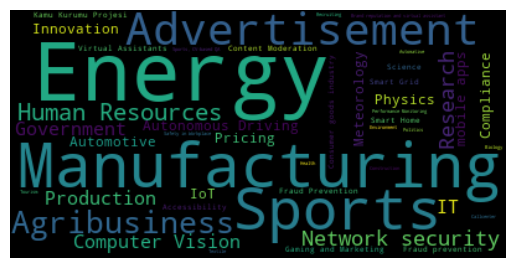

In [16]:
wordcloud(contexts)